In [1]:
from IPython.display import Image

### Player Recommendations for Mr. Rooney and the Washington Wizards

#### 1. Project Goal
The goal of this project was to help Mr. Rooney, the head scout, identify underpaid, high-performing NBA players that the team could target. Using simple clustering techniques, we grouped players based on key performance metrics and salary to find "good value" players and warn against overpaid, low-performing ones.

### 2. How I Prepared the Data

- I combined NBA performance statistics with player salary data.

- I kept only three important performance metrics: 3P shots made, assists (AST), and field goals made (FG).

- I removed missing values and standardized the data so players with different stat scales could be fairly compared.

- I used only active players with available salary information.

The reason I chose these three metrics is that they are key indicators of a player's offensive contribution. 3P shots was chosen among scoring metrics because it is an emerging trend in the NBA currently, where we see every single position shooting 3-pointers. This means that 3P shots made is a good indicator of a player's adjustment to the current trend. Assists are a good indicator of playmaking ability, as they reflect a player's ability to create scoring opportunities for teammates. To remain competitive, we should always look for players that can work with others given baseketball is a team sport. Lastly, field goals made is a good overall scoring metric, as it reflects a player's efficiency in converting opportunities to points. Integrating field goals as a feature, we can also see how well a player performs when they are not shooting 3-pointers.

### 3. What the K-Means Model Does and How We Used It

To make smart player recommendations, I used a tool called a K-Means model.

Here’s the idea:
- It groups players based on their stats, like points, assists, and shooting percentages.
- Players who perform similarly are placed in the same group.
- Players who are very different from others are placed in different groups.

By doing this, we can spot patterns that aren't obvious at first glance.
Instead of looking at players one by one, we look at the groups they belong to.

How we used it:
- After the model created groups, I compared each player's performance (scoring, assists, shooting) against their salary.
- I picked out players who perform better than average but are still paid less than average — these are the best deals for the team.
- I also identified players who are paid a lot but perform below average, so we know who to avoid.

In short:
The model helps us find hidden value, great players who don't cost too much, and avoid overpaying for underperformers.

### 3. Clustering Process

#### 3.1 How We Grouped Players and Chose the Right Number of Groups

Before picking out the best players, I needed a way to group similar players together based on their performance and as I said K-Means Clustering automatically sorts players into groups based on how similar they are in key stats (3P, AST, and FG).

To decide how many groups made the most sense, I used two simple methods:

**Elbow Method (left graph):**
This graph shows that around 4 groups, adding more groups stops improving the model much. That "bend" or slowdown helps find the right balance between simplicity and accuracy.

**Silhouette Score (right graph):**
This score tells us how clearly players fit into their groups. Higher numbers are better. Around 4 groups, the score is still strong and stable, meaning the players are grouped meaningfully.

**Conclusion:**
Both methods suggest that 4 groups is the best choice — it gives us meaningful clusters without making things unnecessarily complicated.

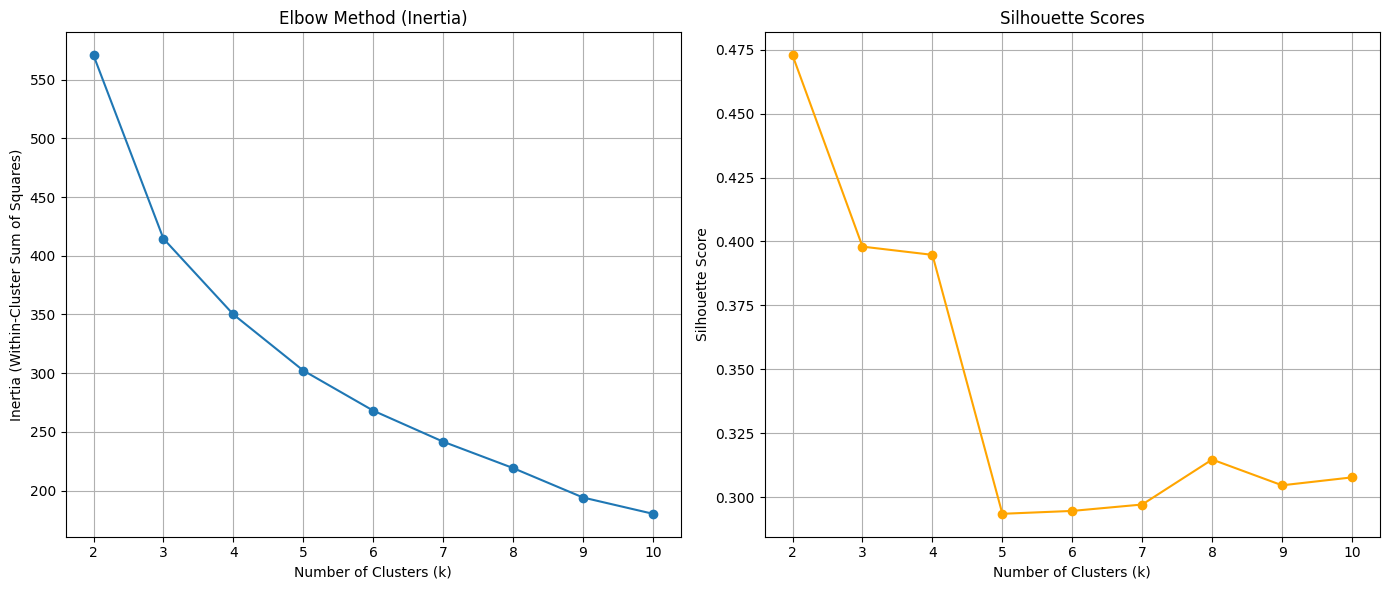

In [3]:
Image('elbowsilhouette.png', width=800, height=400)

#### 3.2 Visualizing Player Groups
I also created a 3D visual of the groups using their 3P, AST, and FG numbers.
In the 3D chart, Each point is a player. Players closer together in the plot perform similarly. Color shows which cluster they belong to.
The 3D plot made it easy to see which players stand out as strong performers versus weaker ones, helping us quickly spot good targets and bad investments.

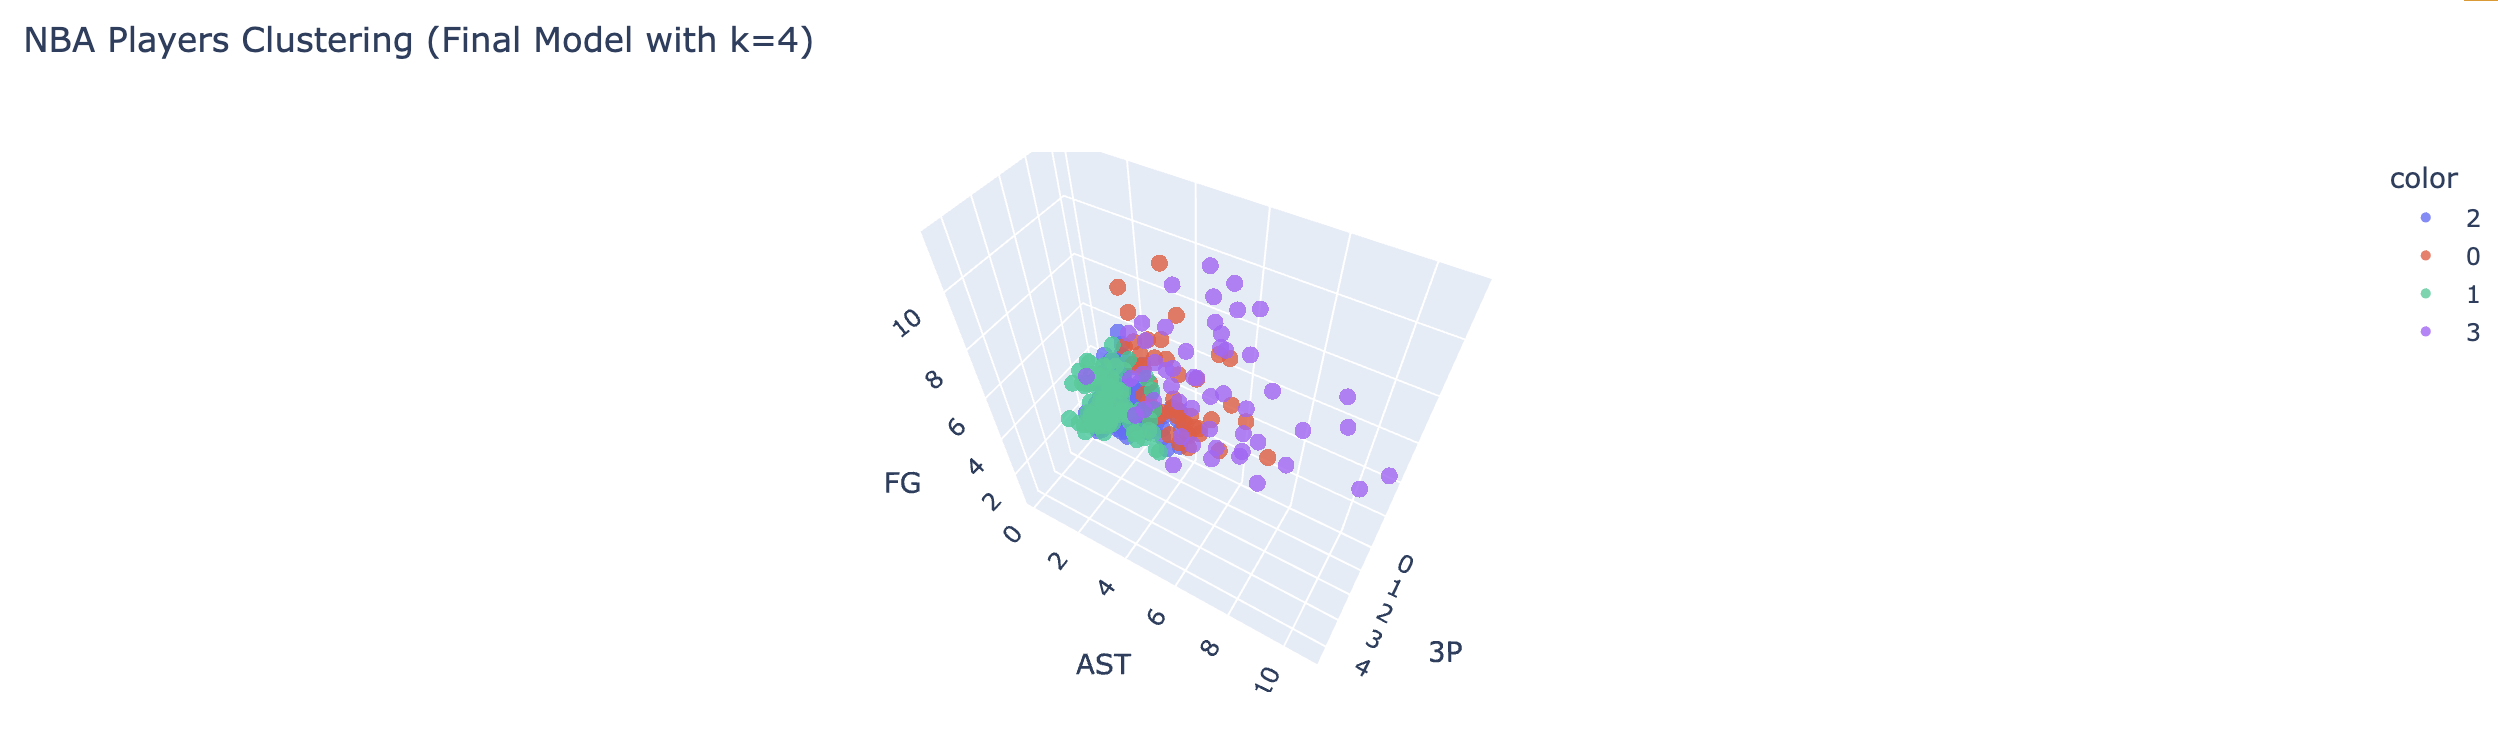

In [5]:
Image('3d.png', width=800, height=400)

#### 4. Evaluation Metrics Meaning
| Metric | Meaning | Good Value | My Value |
|--------|---------|------------|----------|
| Total Variance Explained | How much of the data is captured by clusters | Higher is better (>0.5 ideal) | ~0.70 |
| Silhouette Score | How well separated the clusters are | >0.4 is acceptable | ~0.39 |

To make sure the player groups (clusters) we created actually made sense, we used two quick checks. First, the Total Variance Explained tells us how much of the important information from the player data is captured by the clusters. A higher number means we are grouping players in a smart way and our result of about 0.70 shows that the groups are strong. Second, the Silhouette Score measures how clearly different groups are separated. A value above 0.4 is generally good, and while our score of about 0.39 is just slightly below that, it is still reasonable for real-world sports data, where player stats can naturally overlap. Overall, the metrics tell us that our clustering model is working well enough to guide smart player selections.

### 5. Player Selection Results

##### Good Value Players (High Performance, Lower Salary)

| Player | 3P | AST | FG | Salary |
|--------|-----|-----|----|--------|
| Desmond Bane | 3.0 | 2.7 | 6.7 | $2,130,240 |
| Immanuel Quickley | 1.8 | 3.5 | 3.6 | $2,316,240 |
| Tyrese Maxey | 1.8 | 4.3 | 6.4 | $2,726,880 |
| Saddiq Bey | 2.6 | 2.8 | 5.5 | $2,959,080 |
| Kevin Porter Jr. | 2.5 | 6.2 | 5.5 | $3,217,631 |

##### Overpaid, Lower-Performing Players

| Player | 3P | AST | FG | Salary |
|--------|-----|-----|----|--------|
| Derrick Favors | 0.1 | 0.6 | 2.4 | $10,183,800 |
| JaMychal Green | 0.5 | 0.9 | 2.4 | $10,036,090 |
| DeAndre Jordan | 0.0 | 0.4 | 1.9 | $9,663,997 |
| Ish Wainwright | 0.4 | 0.3 | 0.9 | $9,270,959 |
| Nerlens Noel | 0.0 | 0.9 | 1.3 | $9,240,000 |

### What This Table Shows
This table compares two groups of players based on both performance and salary.

**Good Value Players:**
These players have above-average performance on all three important skills — 3-point shooting (3P), assists (AST), and field goals (FG) — and are paid less than the median salary across all players. They deliver strong results without costing too much.

**Overpaid, Lower-Performing Players:**
These players perform below average on all three of the same key skills, yet they are paid more than the median salary. They cost a lot but don’t produce enough on the court.

**Summary:**
We based these groupings on clear performance and salary standards:
- Good Choices = High in all three skills + Lower salary
- Bad Choices = Low in all three skills + Higher salary

This ensures we are targeting players who give us the most value for the money.

### 6. Conclusion

This simple clustering approach allowed us to spot high-performing, underpaid players that the team could target. At the same time, it flagged players who are paid highly but underperform statistically. By focusing on a few key performance metrics, we made the process easy to understand and actionable for scouting decisions. With that being said, I would recommened that Mr. Rooney and the Washington Wizards consider the players listed in the "Good Value Players" table for potential trades or signings. These players could provide a significant boost to the team's performance without breaking the bank. On the other hand, the players in the "Overpaid, Lower-Performing Players" table should be avoided to prevent overcommitting resources to underperforming talent.

